<a href="https://colab.research.google.com/github/christianabusca/netflix-movies-analysis/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

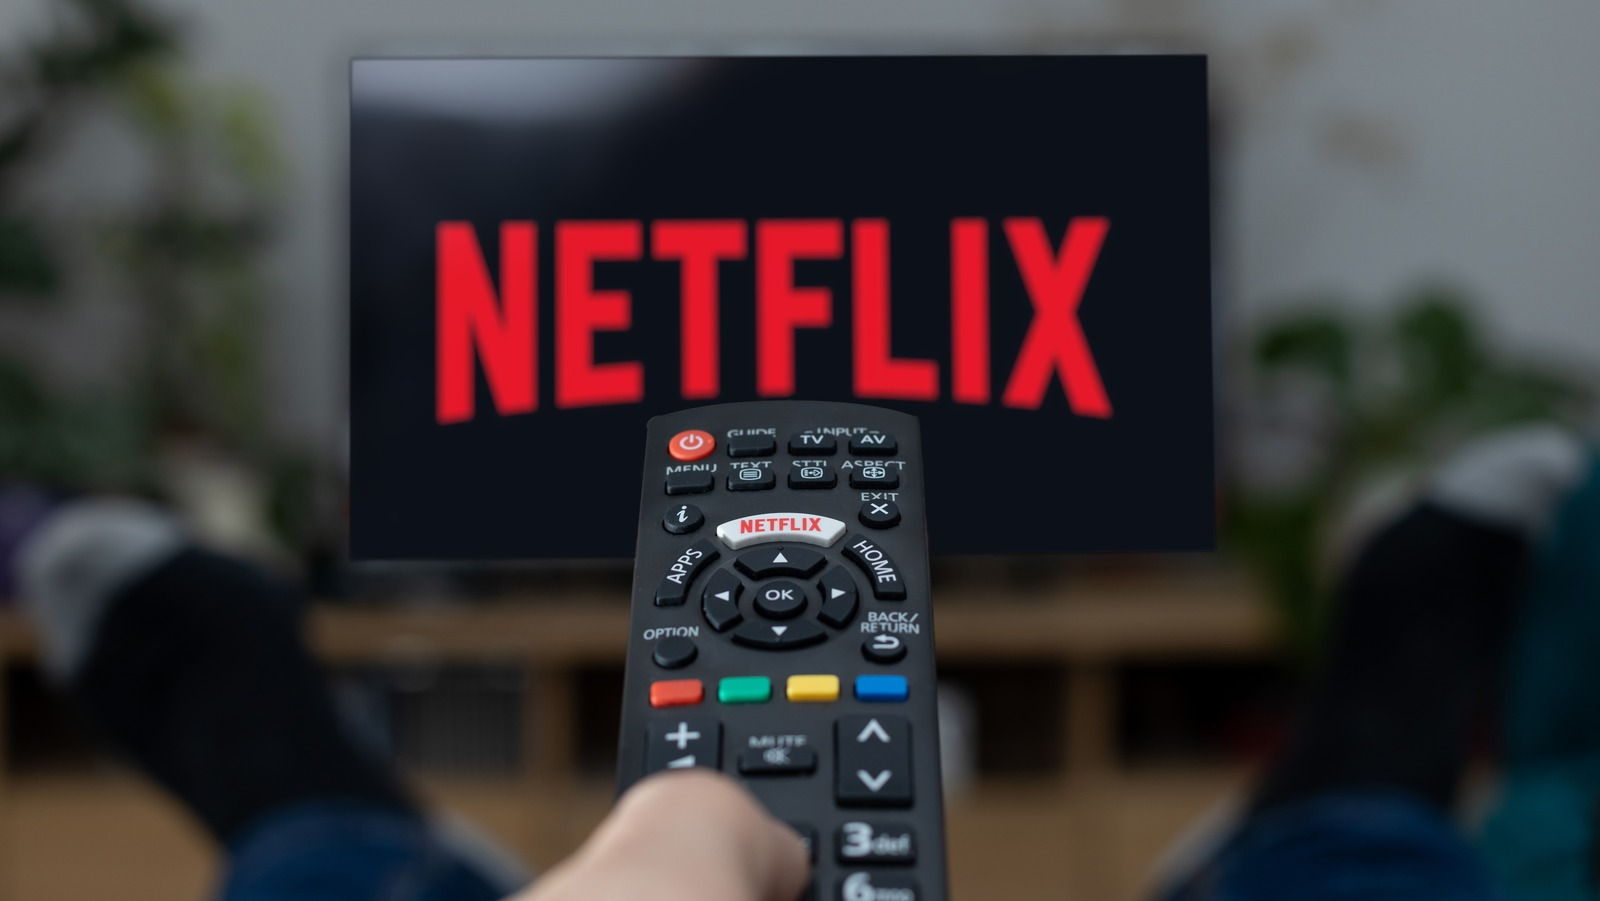

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
# Start coding here! Use as many cells as you like
# 1. Filter the data for movies released in the 1990s
movies = netflix_df[netflix_df['type'] == 'Movie']
release_year = movies[(movies['release_year'] >= 1990) & (movies['release_year'] <= 1999)]

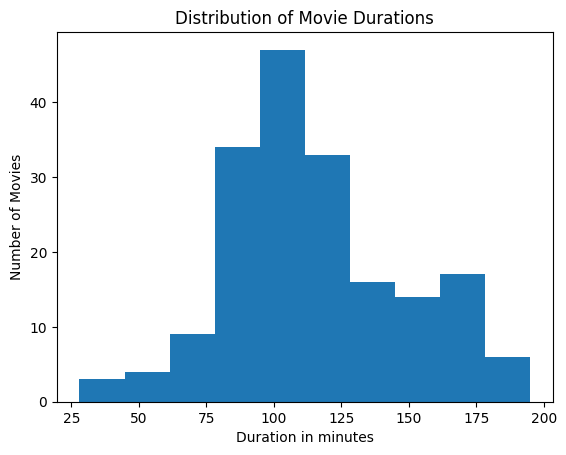

In [ ]:
# 2. Find the most frequent movie duration
plot = release_year['duration']
plt.hist(plot)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Movies')
plt.show()
duration = 100

In [ ]:
# 3. Count the number of short action movies from the 1990s
action = release_year[(release_year['genre'] == 'Action')]
short_movie_count = 0

for i, j in action.iterrows():
    if j['duration'] < 90:
        short_movie_count += 1
    else:
        short_movie_count
print(short_movie_count)

7


In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


🎯 Project: Netflix Content Explorer — Phase 2

**Task 1:** Genre Deep Dive (Warm-up)
Goal: Understand which genres dominated 1990s Netflix movies
Steps:

1. Using your release_year DataFrame (movies from 1990-1999), count how many movies exist for each genre
2. Print the top 5 genres with the most movies
3. Create a horizontal bar chart showing these top 5 genres

Challenge twist: What percentage of 1990s movies does the #1 genre represent?

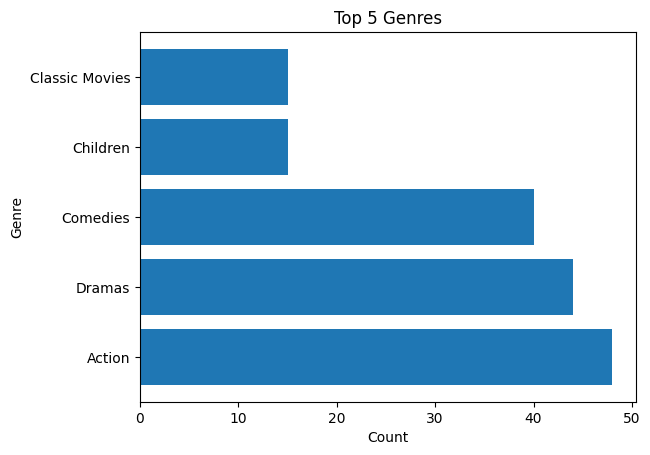

In [ ]:
# Start coding here! Use as many cells as you like
# Task 1

# 1 and 2
# release_year = movies[(movies['release_year'] >= 1990) & (movies['release_year'] <= 1999)]
each_genre = release_year['genre'].value_counts().head()
each_genre

# 3
plt.barh(each_genre.index, each_genre.values)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 5 Genres")
plt.show()





Task 2: The Duration Detective (Building complexity)
Goal: Compare movie lengths across different genres
Steps:

1. Pick 3 genres that interest you (e.g., 'Action', 'Dramas', 'Comedies')
2. For each genre, calculate:

    a. Average duration

    b.Shortest movie
    
    c.Longest movie


3. Create a box plot comparing durations across these 3 genres

Challenge twist: Which genre has the most consistent movie lengths? (Hint: think about the spread of data)

/tmp/ipython-input-884787560.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


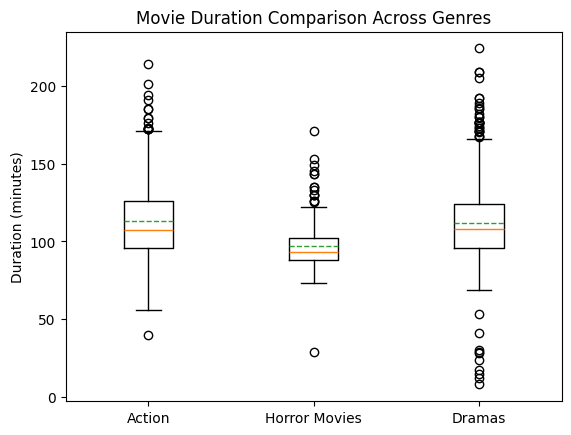

In [31]:
# Start coding here! Use as many cells as you like

# TASK 2
# 1, I choose Action, Horror Movies and Dramas
# 2.A
# Action
action = movies[(movies['genre']=='Action')]
action_avg = action['duration'].mean()
action_shortest = action['duration'].min()
action_longest = action['duration'].max()

# Horror Movies
horror = movies[movies['genre']=='Horror Movies']
horror_avg = horror['duration'].mean()
horror_min = horror['duration'].min()
horror_max = horror['duration'].max()

# Dramas
drama = movies[movies['genre'] == 'Dramas']
drama_avg = drama['duration'].mean()
drama_min = drama['duration'].min()
drama_max = drama['duration'].max()


genre_compare = ['Action', 'Horror Movies', 'Dramas']
filtired = movies[movies['genre'].isin(genre_compare)].groupby('genre')['duration'].agg(['mean', 'min','max'])
data = [movies[movies['genre']==g] ['duration']
        for g in genre_compare]

plt.boxplot(data,
            labels=genre_compare,
            showmeans = True,
            meanline = True)
plt.ylabel("Duration (minutes)")
plt.title("Movie Duration Comparison Across Genres")
plt.show()

Task 3: Time Traveler's Analysis (Connecting concepts)
Goal: See how Netflix content has evolved over decades
Steps:
1. Create 3 groups of movies by decade:
   * 1990s (you've done this!)
   * 2000s (2000-2009)
   * 2010s (2010-2019)
2. For each decade, calculate the average movie duration
3. Create a line plot showing how average duration changed across decades
4. Bonus: Add a horizontal line showing the overall average duration
Challenge twist: Write 2-3 sentences interpreting your findings. Are movies getting shorter? What might explain this trend?

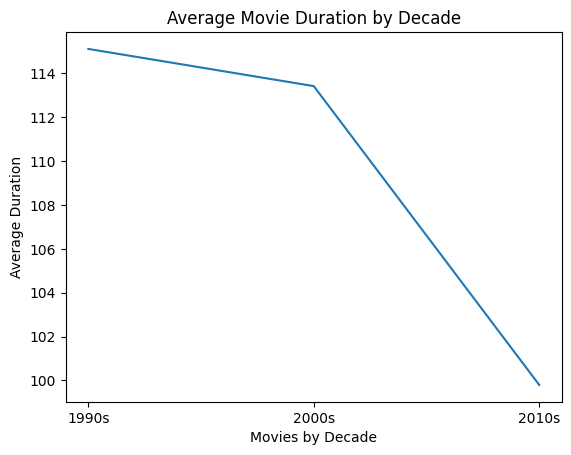

In [43]:
# Start coding here! Use as many cells as you like
release_year_1990 = movies[(movies['release_year'] >= 1990) & (movies['release_year'] <= 1999)]
release_year_2000 = movies[(movies['release_year'] >= 2000) & (movies['release_year'] <= 2009)]
release_year_2010 = movies[(movies['release_year'] >= 2010) & (movies['release_year'] <= 2019)]
avg_1990 = release_year_1990['duration'].mean()
avg_2000 = release_year_2000['duration'].mean()
avg_2010 = release_year_2010['duration'].mean()

decade = ['1990s', '2000s', '2010s']
one = [avg_1990, avg_2000, avg_2010]
plt.xlabel('Movies by Decade')
plt.ylabel('Average Duration')
plt.title('Average Movie Duration by Decade')
plt.plot(decade, one)


Task 4: The Country Comparison (Synthesis challenge)
Goal: Discover if different countries make different types of movies
Steps:
1. Pick 2 countries that produced a lot of content (e.g., 'United States', 'India')
2. For each country, find:
   * Most common genre
   * Average movie duration
   * Total number of movies in the dataset
3. Create a side-by-side comparison (you choose the visualization!)


Challenge twist: Filter for only movies released after 2010. Do the patterns change for recent content?

In [83]:
# Start coding here! Use as many cells as you like

# 1
country = netflix_df.groupby('country')['type'].agg('count').sort_values(ascending=False)
country.head()

us = netflix_df[(netflix_df['country'] == 'United States')]
us_count = us['genre'].value_counts().head(1)
us_count
us_avg = us[us['type'] == 'Movie'].groupby('type')['duration'].mean()
us_avg

,duration
type,
Movie,92.856142


🌟 Final Boss Task: Your Netflix Report (Putting it all together)
Create a single Python script that:
1. Generates 3-4 different visualizations from the tasks above
2. Uses plt.subplot() or plt.figure() to display them together
3. Includes a title and proper labels on each chart
4. Prints 3-5 key findings as text output
The Challenge: Make it so clear that someone who's never seen the data could understand your insights!



In [ ]:
# Start coding here! Use as many cells as you like
